Student Information Name:林孮瑋

Student ID:110062665

GitHub ID:JohnnyLin97
_______________________________________________________________________________________________________________________________

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# Part.1 Take Home Exercises

### Exercise 2      
Experiment with other querying techniques using pandas dataframes

In [29]:
"""this cell complete the same task as lab1-master"""

# data preparation
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

import pandas as pd
import helpers.data_mining_helpers as dmh


# converting to pandas dataframe and adding columns
df = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
df['category'] = twenty_train.target
df['category_name'] = df.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [38]:
# search category of "sci.med" from index 100 to 150
filt = (df['category_name'] == 'sci.med')
df.loc[100:150][filt]

<ipython-input-38-862502edb84d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[100:150][filt]


,text,category,category_name
103,From: mrb@cbnewsj.cb.att.com (m..bruncati) Sub...,2,sci.med
109,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,2,sci.med
111,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
115,"Subject: ""STAR GARTDS"" <sp?> Info wanted From:...",2,sci.med
117,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
121,From: cash@convex.com (Peter Cash) Subject: Re...,2,sci.med
123,From: david@stat.com (David Dodell) Subject: H...,2,sci.med
126,From: rousseaua@immunex.com Subject: Re: Barbe...,2,sci.med
132,From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...,2,sci.med


### Exercise 5
Please check the data and the process below, describe what you observe and why it happened.

In [42]:
"""this cell complete the same task as lab1-master"""

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df



,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [43]:
"""this cell complete the same task as lab1-master"""

NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [47]:
# Check type of each inex
for i in range(0,6):
    print(type(NA_df['missing_example'][i]))

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


Obviously, index 2、3、5 are type 'str', so they're not null.
When numpy reading a number that is not readable or null, numpy would set this field to "nan". It's easy to identify as null, but sometimes may be some error of data type.
Index 1 is empty and index4 is 'None'. It's easy to identify them as null.

### Exercise 6
Notice any changes to the dataframe? What are they? Report every change you noticed as compared to the previous state of dataframe.

In [67]:
df_sample = df.sample(n=1000)
df_sample[0:10]

,text,category,category_name
283,From: tcsteven@iaserv.b1.ingr.com (Todd Steven...,3,soc.religion.christian
598,From: spl@ivem.ucsd.edu (Steve Lamont) Subject...,1,comp.graphics
1519,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
1744,From: davpa@ida.liu.se (David Partain) Subject...,2,sci.med
1791,From: heath@athena.cs.uga.edu (Terrance Heath)...,3,soc.religion.christian
863,From: dxf12@po.cwru.edu (Douglas Fowler) Subje...,3,soc.religion.christian
94,From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AI...,1,comp.graphics
871,From: cs89mcd@brunel.ac.uk (Michael C Davis) S...,3,soc.religion.christian
478,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
694,From: greg@cs.uct.ac.za (Gregory Torrance) Sub...,1,comp.graphics


In [88]:
for i in range(0,4):
    counter_before = df.apply(lambda x: True if x[1] == i else False , axis=1)
    counter_after = df_sample.apply(lambda x: True if x[1] == i else False , axis=1)
    print("category=",i,"(before): ",len(counter_before[counter_before == True].index),\
          "   |   category=",i,"(after): ",len(counter_after[counter_after == True].index))

category= 0 (before):  480    |   category= 0 (after):  201
category= 1 (before):  584    |   category= 1 (after):  287
category= 2 (before):  594    |   category= 2 (after):  261
category= 3 (before):  599    |   category= 3 (after):  251


1.Sampling would randomly pick data, so the order of index would be out of order.  
2.Sampling would pick different data each time.  
3.Each category is picked into nearly the same amount each time

### Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

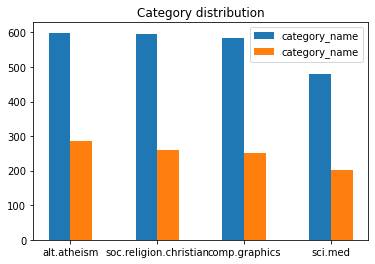

In [78]:
import matplotlib.pyplot as plt

width = 0.25
x = np.arange(4)
plt.bar(x - width/2,df.category_name.value_counts(), width, label='category_name')
plt.bar(x + width/2,df_sample.category_name.value_counts(), width, label='category_name')
plt.title('Category distribution')
plt.xticks(x, categories)
plt.legend()
plt.show()

### Exercise 10
Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary.

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

# Search which index is 1, then get the corresponding term 
for i in range(0,100):
    if df_counts[4,i]==1:
        print("Word ",i," is:",count_vect.get_feature_names()[i])

Word  0  is: 00
Word  37  is: 01


### Exercise 11
As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

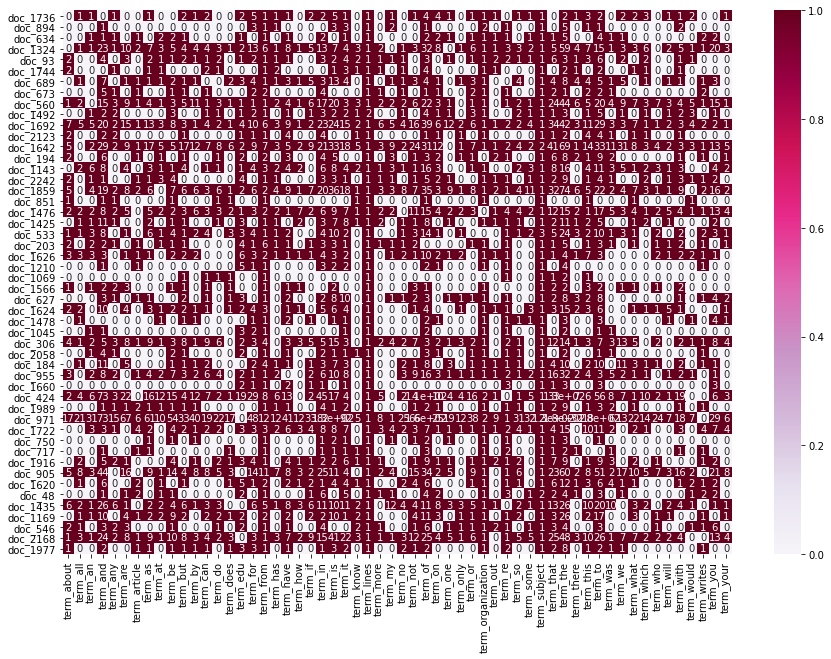

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# sample 50 articles and terms, and set min_df
df_sample = df_sample.sample(50)
count_vect50 = CountVectorizer(min_df=20)
df_counts_sample = count_vect50.fit_transform(df_sample.text)

"""same as lab1-master"""
plot_x = ["term_"+str(i) for i in count_vect50.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(df_sample.index)[0:]]
plot_z = df_counts_sample[0:, 0:].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

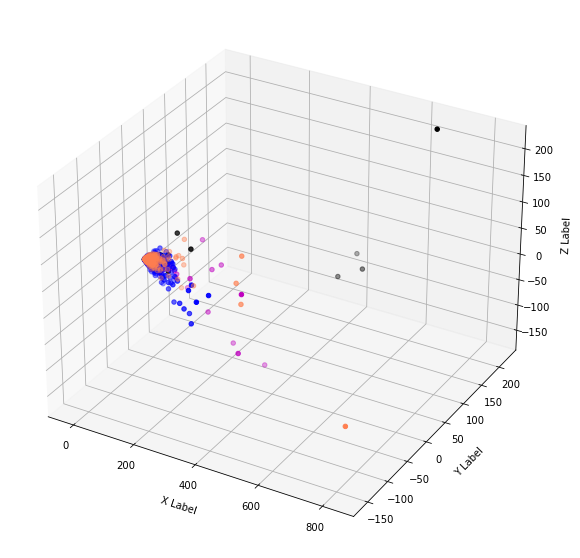

In [116]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

# plot
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
    zs = df_reduced[df['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2) # 配置網格線
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()    

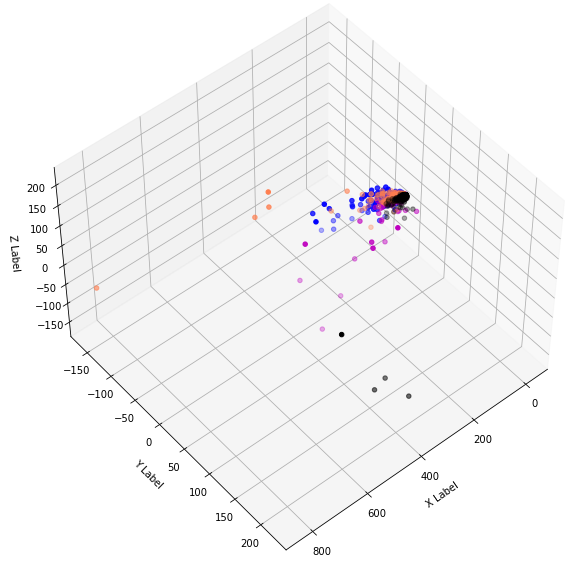

In [121]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

# plot
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
    zs = df_reduced[df['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2) # 配置網格線
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# set different angle
ax.view_init(elev=50, azim=50)

plt.show()  

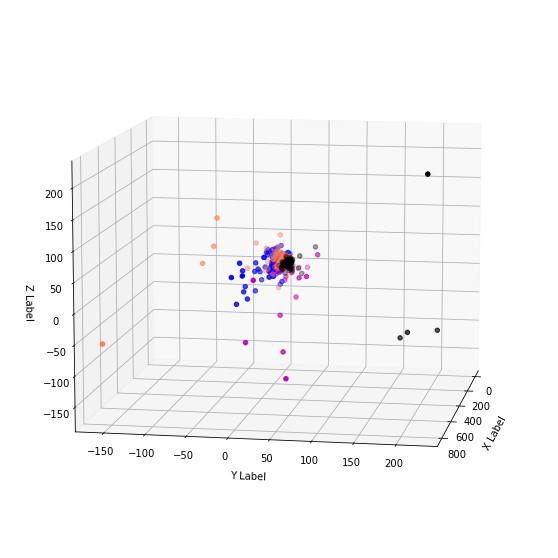

In [119]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

# plot
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
    zs = df_reduced[df['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2) # 配置網格線
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# set different angle
ax.view_init(elev=10, azim=10)

plt.show()  

### Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [122]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [126]:
import plotly.express as px

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

fig = px.histogram(df, 
                   x=count_vect.get_feature_names(), 
                   y=term_frequencies, 
                   title='Terms')

### Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise

### Exercise 15
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. 

In [130]:
# Sorting frequencies in desceding to get above graph
dict_xy = {"feature":["term_"+str(i) for i in count_vect.get_feature_names_out()],"frequencies":term_frequencies}
df_xy = pd.DataFrame(dict_xy)

df_xy_sort = df_xy.sort_values(by="frequencies",ascending=False)
x = df_xy_sort["feature"][:300]
y = df_xy_sort["frequencies"][:300]

fig5 = go.Figure(data = [go.Bar(x=x, y=y)])
fig5.show()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'